In [1]:
import os, sys, PIL, time
import numpy as np
np.random.seed(1234)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import tensorflow as tf
import keras
from keras import backend as K
print 'keras backend: ', K._BACKEND
print 'keras version: ', keras.__version__
print 'tensorflow version: ', tf.__version__

sess = tf.Session()
K.set_session(sess)
# fix input size in model for tensorflow
K.set_image_dim_ordering('th')

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
Using TensorFlow backend.


keras backend:  tensorflow
keras version:  2.0.0
tensorflow version:  1.0.1


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator

In [3]:
def unpickle(filename):
    import cPickle
    with open(filename, 'rb') as fo:
        dict = cPickle.load(fo)
    return dict

In [4]:
labelNames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

datafolder = 'data/cifar-10-batches-py/'

#Xtrain = []
#ytrain = []
#Xtest = []
#ytest = []

Xtrain = np.ndarray((50000, 3, 32, 32)).astype(np.float32)
ytrain = np.ndarray((50000)).astype(np.uint8)
Xtest = np.ndarray((10000, 3, 32, 32)).astype(np.float32)
ytest = np.ndarray((10000)).astype(np.uint8)

for i in range(5):
    train = unpickle(datafolder + 'data_batch_%d' %(i+1))
    Xtrain[10000*i : 10000*(i+1), :, :, :] = train['data'].reshape((10000, 3, 32, 32)).astype(np.float32)
    ytrain[10000*i : 10000*(i+1)] = train['labels']
#     if i == 1:
#         Xtrain = train['data'].astype(np.float32)
#         ytrain = train['labels']
#     else:
#         Xtrain = np.concatenate((Xtrain, train['data']), axis=0)
#         ytrain = np.concatenate((ytrain, train['labels']), axis=0)

while True:
    test = unpickle(datafolder + 'test_batch')
    Xtest = test['data'].reshape((10000, 3, 32, 32)).astype(np.float32)
    ytest = np.asarray(test['labels'])
    break


ytrainSimp = ytrain
ytestSimp = ytest
ytrain = np_utils.to_categorical(ytrain)
ytest = np_utils.to_categorical(ytest)

print 'Xtrain shape:', Xtrain.shape
print 'ytrain shape:', ytrain.shape
print 'Xtest shape:', Xtest.shape
print 'ytest shape:', ytest.shape

Xtrain = Xtrain / 255.0
Xtest = Xtest / 255.0

Xtrain shape: (50000, 3, 32, 32)
ytrain shape: (50000, 10)
Xtest shape: (10000, 3, 32, 32)
ytest shape: (10000, 10)


In [5]:
def showImage(index, X, y):
    img = np.ndarray(shape=(32, 32, 3)).astype(np.uint8)
    for i in range(3):
        img[:, :, i] = Xtrain[index, i, :, :] * 255
    
    plt.figure()
    plt.imshow(img)
    plt.title('%d - %s' %(y[index][0], labelNames[y[index][0]]))
    plt.grid(False)
    plt.show()

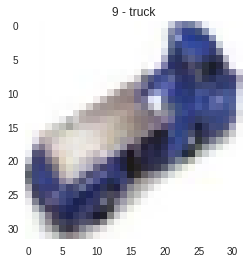

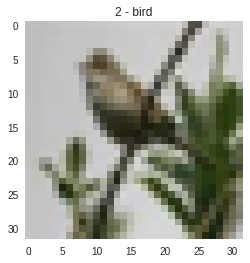

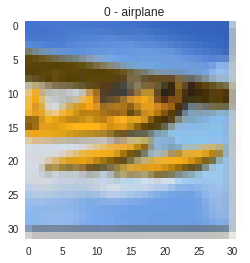

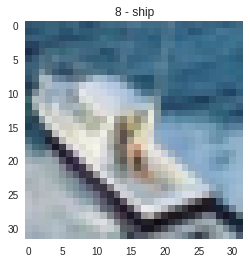

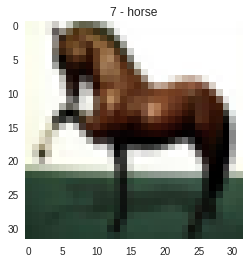

In [6]:
for i in range(5):
    showImage(np.random.randint(0, 49999, size=1), Xtrain, ytrainSimp)
    time.sleep(1)

In [7]:
def cifar10Model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
    print model.summary()
    return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 30, 30)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 28, 28)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 14, 14)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 14, 14)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 12, 12)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 6, 6)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64, 6, 6)          0         
__________

In [13]:
start = time.time()
if os.path.exists('cnn.model.h5'):
    print 'Model found.'
    model = keras.models.load_model('cnn.model.h5')
    model.summary()
else:
    'Creating model'
    model = cifar10Model()
history = model.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), epochs=20, batch_size=128)
print 'Model took %0.1f s to train.' %(time.time() - start) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 30, 30)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 28, 28)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 14, 14)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 14, 14)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 12, 12)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 6, 6)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 64, 6, 6)          0         
__________

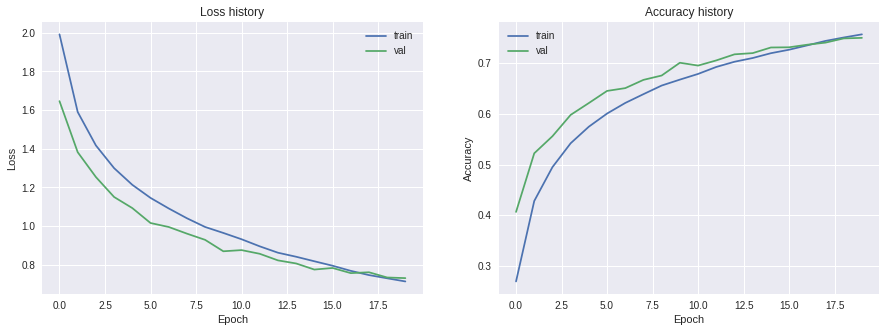

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(history.history['loss'], label='train')
ax[0].plot(history.history['val_loss'], label='val')
#plt.yscale('log')
ax[0].set_title('Loss history')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='best')

ax[1].plot(history.history['acc'], label='train')
ax[1].plot(history.history['val_acc'], label='val')
#plt.yscale('log')
ax[1].set_title('Accuracy history')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend(loc='best')
plt.show()

In [15]:
#model.save_weights('cnn.cifar10.0.75.hdf')

In [12]:
#model.save('cnn.model.h5')